An analysis of my listening history in Spotify. I requested a data download which came in the form of a few JSON files.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [3]:
# Import the data from three Json files
dataall = []

for i in range(0,3):
    with open('/Users/jackohagan/Documents/datascience/Spotify/StreamingHistory{}.json'.format(i), encoding='utf8') as f:
            data = json.load(f)
    dataall.append(data)




In [4]:
# Convert from JSON to a data frame, loop through list of json files

df = pd.DataFrame()

def extract_json_value(column_name):
    data = []
    for i in dataall:
        for d in i:
             data.append(d[column_name])
    return data
        

df['artist_name'] = extract_json_value('artistName')
df['end_time'] = extract_json_value('endTime')
df['ms_played'] = extract_json_value('msPlayed')
df['track_name'] = extract_json_value('trackName')

In [5]:
df

,artist_name,end_time,ms_played,track_name
0,Tom Misch,2019-06-25 03:37,187136,It Runs Through Me
1,Loyle Carner,2019-06-25 03:37,682,You Don't Know
2,Loyle Carner,2019-06-25 03:37,1173,You Don't Know
3,Mura Masa,2019-06-25 03:39,5120,Move Me
4,Mura Masa,2019-06-25 03:39,640,Move Me
...,...,...,...,...
29995,Blawan,2020-04-30 00:30,3242,993
29996,J. Cole,2020-04-30 00:30,28316,No Role Modelz
29997,Omar S,2020-04-30 00:30,9962,The Shit Baby
29998,Aretha Franklin,2020-04-30 00:30,15189,School Days


In [6]:
#tidy up some columns - end_time to timestamp. It's in UTC so convert to au time 

df['end_time'] = pd.to_datetime(df['end_time'])
df['end_time'] = df['end_time'].dt.tz_localize('utc').dt.tz_convert('Australia/Sydney')
df.head()

,artist_name,end_time,ms_played,track_name
0,Tom Misch,2019-06-25 13:37:00+10:00,187136,It Runs Through Me
1,Loyle Carner,2019-06-25 13:37:00+10:00,682,You Don't Know
2,Loyle Carner,2019-06-25 13:37:00+10:00,1173,You Don't Know
3,Mura Masa,2019-06-25 13:39:00+10:00,5120,Move Me
4,Mura Masa,2019-06-25 13:39:00+10:00,640,Move Me


In [7]:
df['minutes_played'] = df.ms_played.divide(60000)
df.drop('ms_played', axis=1, inplace=True)
df.head()

,artist_name,end_time,track_name,minutes_played
0,Tom Misch,2019-06-25 13:37:00+10:00,It Runs Through Me,3.118933
1,Loyle Carner,2019-06-25 13:37:00+10:00,You Don't Know,0.011367
2,Loyle Carner,2019-06-25 13:37:00+10:00,You Don't Know,0.019550
3,Mura Masa,2019-06-25 13:39:00+10:00,Move Me,0.085333
4,Mura Masa,2019-06-25 13:39:00+10:00,Move Me,0.010667


In [8]:
most_played_artists_by_count = df.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
J Hus            1963
Loyle Carner     1837
Skepta           1059
Joy Crookes       887
Amy Winehouse     755
NSG               674
Stormzy           587
Dave              459
Miraa May         414
slowthai          414
imbi the girl     406
Kojey Radical     366
Pip Millett       342
Skengdo           338
Songer            322
Name: track_name, dtype: int64


In [9]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = df.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Halfcast Podcast                     5960.151817
J Hus                                3932.811867
Loyle Carner                         2332.627500
Joy Crookes                          1573.290467
NSG                                  1381.013533
Amy Winehouse                        1215.565767
Skepta                               1158.494567
Stormzy                              1013.046783
Under The Skin with Russell Brand     963.312100
Dave                                  921.399917
In Our Time                           699.995167
THE ADAM BUXTON PODCAST               684.101400
LAUSSE THE CAT                        604.932200
Stuff You Should Know                 584.406033
Football Weekly                       584.180750
Name: minutes_played, dtype: float64

In [10]:
## import song playlist data
songs = pd.read_csv('/Users/jackohagan/Documents/datascience/Spotify/songnamedata.csv')

In [11]:
songs.head()

,Unnamed: 0,Artist,TrackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,551,Donna Summer,"Bad Girls - 12"" Version",0.978,0.481,0.242,0.00785,0.643000,0.0903,0.197
1,214,Ms. Lauryn Hill,I Find It Hard to Say (Rebel) - Live,0.975,0.450,0.277,0.10800,0.674000,0.1020,0.357
2,1639,DJ Mitsu The Beats,A Little Piano,0.969,0.523,0.196,0.31600,0.000007,0.1200,0.735
3,391,Kink,Existence,0.968,0.345,0.151,0.15400,0.003440,0.0425,0.954
4,687,Post Malone,Blame It On Me,0.968,0.589,0.255,0.05110,0.000000,0.0731,0.268


In [12]:
##merge on artis/trackaname
songs['merge'] = songs['Artist'] + ' - ' + songs['TrackName']
df['merge'] = df['artist_name'] + ' - ' + df['track_name']

In [13]:
##checked, and there were some null values on a left join. I'll just ignore these, and use an inner
df_merged = df.merge(songs, how='inner', on='merge')

In [14]:
df_merged

,artist_name,end_time,track_name,minutes_played,merge,Unnamed: 0,Artist,TrackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,Tom Misch,2019-06-25 13:37:00+10:00,It Runs Through Me,3.118933,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.1450,0.000006,0.164,0.274
1,Tom Misch,2019-06-26 08:38:00+10:00,It Runs Through Me,0.005333,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.1450,0.000006,0.164,0.274
2,Tom Misch,2019-06-26 08:52:00+10:00,It Runs Through Me,1.630933,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.1450,0.000006,0.164,0.274
3,Tom Misch,2019-06-26 08:57:00+10:00,It Runs Through Me,4.943283,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.1450,0.000006,0.164,0.274
4,Tom Misch,2019-06-28 08:34:00+10:00,It Runs Through Me,2.326750,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.1450,0.000006,0.164,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22813,J. Cole,2020-04-29 11:45:00+10:00,Apparently,0.637150,J. Cole - Apparently,560,J. Cole,Apparently,0.749,0.491,0.0403,0.0200,0.008990,0.159,0.536
22814,J. Cole,2020-04-29 13:46:00+10:00,Apparently,4.337050,J. Cole - Apparently,560,J. Cole,Apparently,0.749,0.491,0.0403,0.0200,0.008990,0.159,0.536
22815,J. Cole,2020-04-29 15:22:00+10:00,Apparently,0.020267,J. Cole - Apparently,560,J. Cole,Apparently,0.749,0.491,0.0403,0.0200,0.008990,0.159,0.536
22816,Blanco,2020-04-29 09:39:00+10:00,Pull Up,0.036617,Blanco - Pull Up,1147,Blanco,Pull Up,0.457,0.362,0.0537,0.8420,0.041500,0.190,0.490


In [15]:
##what days do i listen to more music
df_merged['dayname']= df_merged['end_time'].dt.day_name()
df_merged['hour']= df_merged['end_time'].dt.hour

In [16]:
df_merged
##remove any songs i played for less than a minute..to get rid of any weirdness
df_cleaned = df_merged[df_merged['minutes_played'] > 1.0]

In [17]:
df_cleaned.head()

,artist_name,end_time,track_name,minutes_played,merge,Unnamed: 0,Artist,TrackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,dayname,hour
0,Tom Misch,2019-06-25 13:37:00+10:00,It Runs Through Me,3.118933,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.145,0.000006,0.164,0.274,Tuesday,13
2,Tom Misch,2019-06-26 08:52:00+10:00,It Runs Through Me,1.630933,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.145,0.000006,0.164,0.274,Wednesday,8
3,Tom Misch,2019-06-26 08:57:00+10:00,It Runs Through Me,4.943283,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.145,0.000006,0.164,0.274,Wednesday,8
4,Tom Misch,2019-06-28 08:34:00+10:00,It Runs Through Me,2.326750,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.145,0.000006,0.164,0.274,Friday,8
6,Tom Misch,2019-06-29 11:00:00+10:00,It Runs Through Me,4.364683,Tom Misch - It Runs Through Me,686,Tom Misch,It Runs Through Me,0.652,0.591,0.0418,0.145,0.000006,0.164,0.274,Saturday,11


In [18]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned.groupby('dayname').agg('mean').reindex(cats)

,minutes_played,Unnamed: 0,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,hour
dayname,,,,,,,,,,
Monday,3.070878,1134.654337,0.690698,0.663614,0.170731,0.218619,0.066780,0.196040,0.555951,13.184949
Tuesday,3.020590,1154.370487,0.686496,0.666328,0.172966,0.225351,0.057776,0.179789,0.558356,13.254840
Wednesday,3.133784,1140.381519,0.689302,0.664798,0.176435,0.226460,0.066627,0.184595,0.563713,13.069533
Thursday,3.164467,1122.248120,0.681041,0.664130,0.173479,0.229333,0.059898,0.177074,0.557861,13.315252
Friday,3.082742,1128.681902,0.696500,0.663717,0.175145,0.215938,0.064831,0.186216,0.570464,12.836103
Saturday,2.887717,1121.742656,0.693821,0.653457,0.173447,0.218923,0.074359,0.180509,0.553399,12.560517
Sunday,2.920807,1108.132075,0.689004,0.660874,0.167091,0.229029,0.060134,0.171297,0.571108,13.572327


It looks like my listening is pretty consistent across days, how about hour of the day?

In [19]:
groupbyhour = df_cleaned.groupby('hour').agg('mean')
groupbyhour = groupbyhour.drop('minutes_played', axis=1)
groupbyhour = groupbyhour.drop('Unnamed: 0', axis=1)
groupbyhour.head(25)



,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
hour,,,,,,,
0,0.710958,0.549204,0.152546,0.307871,0.289194,0.120800,0.530833
1,0.733400,0.719400,0.231400,0.231860,0.000000,0.146400,0.726000
2,0.749500,0.757500,0.370500,0.160500,0.000021,0.072150,0.538000
5,0.647500,0.656500,0.163300,0.143071,0.257220,0.161375,0.551687
6,0.764933,0.626400,0.120960,0.133426,0.044375,0.145293,0.572400
7,0.699914,0.650812,0.169960,0.227790,0.050446,0.172233,0.554440
8,0.672367,0.692979,0.176672,0.211585,0.051156,0.205432,0.559373
9,0.678507,0.668408,0.180467,0.218728,0.054927,0.190924,0.559802
10,0.698781,0.667561,0.160426,0.225110,0.069205,0.167197,0.574073


In [20]:
groupbyhour = df_cleaned.groupby(pd.cut(df_cleaned["hour"], np.arange(0, 24, 1))).mean()
groupbyhour = groupbyhour.drop('minutes_played', axis=1)
groupbyhour = groupbyhour.drop('Unnamed: 0', axis=1)
groupbyhour.head(24)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,hour
hour,,,,,,,,
"(0, 1]",0.733400,0.719400,0.231400,0.231860,0.000000,0.146400,0.726000,1.0
"(1, 2]",0.749500,0.757500,0.370500,0.160500,0.000021,0.072150,0.538000,2.0
"(2, 3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, 5]",0.647500,0.656500,0.163300,0.143071,0.257220,0.161375,0.551687,5.0
"(5, 6]",0.764933,0.626400,0.120960,0.133426,0.044375,0.145293,0.572400,6.0
"(6, 7]",0.699914,0.650812,0.169960,0.227790,0.050446,0.172233,0.554440,7.0
"(7, 8]",0.672367,0.692979,0.176672,0.211585,0.051156,0.205432,0.559373,8.0
"(8, 9]",0.678507,0.668408,0.180467,0.218728,0.054927,0.190924,0.559802,9.0


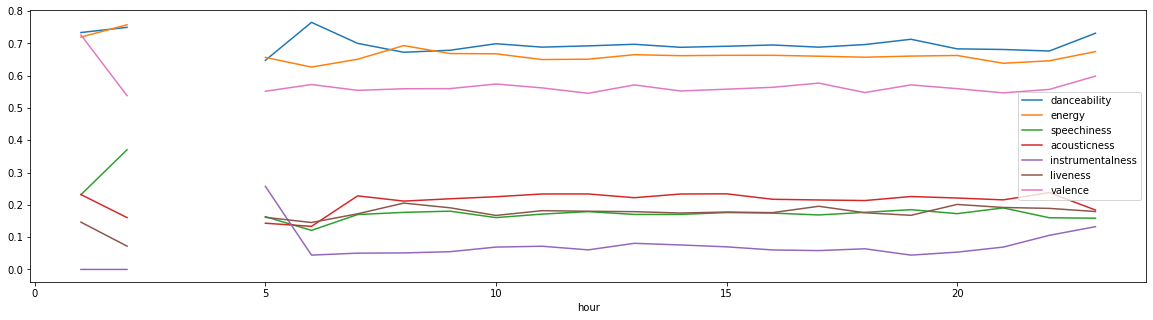

In [21]:
groupbyhour.plot(x='hour', figsize = (20,5))


Looks like overall I prefer songs that are danceable, energetic and 'valence'. 
Strange peak of danceability at 6am, and rising through midnight until 1 - 2 am.
There's no data for 2-5am.

In [38]:
##what features correlate with minutes played? can I predict the amount of minutes placed based on the features of the song?

## lets do a linear regression - there is most defintely multicolinearity, but oh well..

import statsmodels.api as sm

minutes_played = df_merged.groupby('merge').agg({'minutes_played':'sum','danceability':'max','energy':'max',
                                                 'speechiness':'max','acousticness':'max',
                                                 'instrumentalness':'max','liveness':'max', 'valence':'max'})
minutes_played.head()

,minutes_played,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
merge,,,,,,,,
2 Unlimited - Tribal Dance,30.803917,0.742,0.422,0.0309,0.55900,0.000041,0.0402,0.592
2Pac - Can't C Me,8.647317,0.736,0.695,0.1090,0.22400,0.013800,0.0884,0.816
2Pac - Hit 'Em Up (Feat. Tha Outlawz),13.085867,0.643,0.685,0.0506,0.00148,0.619000,0.0586,0.701
2nd Exit - If You Wouldn't Mind,71.665350,0.745,0.572,0.1740,0.70500,0.000000,0.1460,0.663
49ers - Touch Me 2010 - Original Sexualversion,2.681917,0.798,0.699,0.0392,0.00215,0.820000,0.0693,0.617


In [39]:
Y = minutes_played['minutes_played'] 
x = minutes_played[['danceability', 'energy','speechiness', 'acousticness', 'instrumentalness','liveness', 'valence']]

In [45]:
model = sm.OLS(Y,x).fit()
model_prediction = model.predict(x)
model_details = model.summary()
print(model_details)


                                 OLS Regression Results                                
Dep. Variable:         minutes_played   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.171
Method:                 Least Squares   F-statistic:                              34.68
Date:                Sun, 02 May 2021   Prob (F-statistic):                    5.23e-44
Time:                        00:17:28   Log-Likelihood:                         -6507.9
No. Observations:                1142   AIC:                                  1.303e+04
Df Residuals:                    1135   BIC:                                  1.306e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [52]:
minutes_played.sort_values('valence', ascending = False)

,minutes_played,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
merge,,,,,,,,
Omar S - The Shit Baby,21.988167,0.747,0.9730,0.0370,0.000357,0.565000,0.3080,0.9830
Mac Miller - Hurt Feelings,0.049400,0.913,0.5640,0.0770,0.000020,0.945000,0.2140,0.9810
Lily Allen - Higher,10.655283,0.910,0.5630,0.0789,0.000019,0.937000,0.2150,0.9810
Corinne Bailey Rae - Put Your Records On,5.652233,0.697,0.8090,0.0302,0.114000,0.000521,0.1830,0.9800
Rihanna - Pon de Replay,0.454000,0.712,0.7850,0.0386,0.003630,0.000007,0.0878,0.9750
...,...,...,...,...,...,...,...,...
Joy Orbison - Transition 2,0.020967,0.655,0.8870,0.0387,0.003100,0.839000,0.1400,0.0338
Jme - Serious,1.144500,0.171,0.0247,0.0489,0.934000,0.826000,0.0835,0.0316
Tame Impala - The Less I Know The Better,6.363367,0.101,0.1630,0.0486,0.982000,0.905000,0.0906,0.0307


Interesting results, but the only 'significant' result is instrumentalness, in other words a fully 'instrumental' song would decrease the amount I'd listen to a song by 25 minutes.... it looks like speechy, high energy songs are ones I'm most likely to listen to, but these results aren't significant. 

In [224]:
##kmeans clustering for groups of songs...
##group by name, and sum minutes played.


cols = [val for val in df_merged.columns if val != 'minutes_played']
temp = pd.concat([df_merged.groupby(['merge'])[cols].mean(), df_merged.groupby(['merge'])['minutes_played'].sum()], axis=1).reset_index()
temp = temp.drop('Unnamed: 0', axis=1)
temp = temp.drop('hour', axis=1)

In [232]:
temp.head()
##get features and normalise
from sklearn.preprocessing import normalize
X= temp[['danceability','energy','speechiness','acousticness', 'instrumentalness','liveness','valence']]

normalized = normalize(X)

### from sklearn.cluster import KMeans
wcss = []

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(normalized)
    wcss.append(kmeans.inertia_)

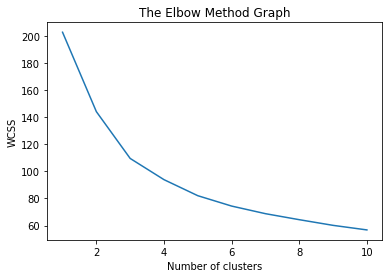

In [242]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [243]:
##looks like three clusters is a good amount
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(normalized)

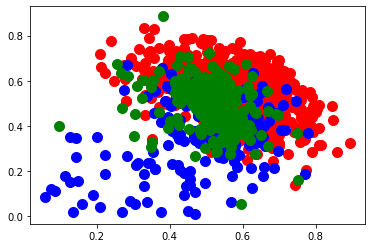

In [245]:
plt.scatter(normalized[y_kmeans==0, 0], normalized[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(normalized[y_kmeans==1, 0], normalized[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(normalized[y_kmeans==2, 0], normalized[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(normalized[y_kmeans==3, 0], normalized[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(normalized[y_kmeans==4, 0], normalized[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.show()

In [ ]:
##high dimensional clusters so i will need to use PCA ..........